In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading datasets 
df = pd.read_csv('Indian automobile buying behaviour.csv')


In [3]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [5]:
df.isna().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [6]:
for x in df.columns:
    print(x, ':', df[x].nunique())

Age : 22
Profession : 2
Marrital Status : 2
Education : 2
No of Dependents : 4
Personal loan : 2
House Loan : 2
Wife Working : 3
Salary : 24
Wife Salary : 14
Total Salary : 36
Make : 9
Price : 10


In [7]:
df['Wife Working'].unique()

array(['No', 'Yes', 'm'], dtype=object)

In [8]:
df[df['Wife Working'] == 'm']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


In [9]:
df['Wife Working'] = df['Wife Working'].replace({'m' : 'No'})

In [10]:
df['Wife Working'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
col_cat = ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working']

col_con = []
for x in df.columns:
    if x not in col_cat and x != 'Make':
        col_con.append(x)

print('Categorical Features:', col_cat)
print('Continous Features', col_con)

Categorical Features: ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working']
Continous Features ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']


In [12]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


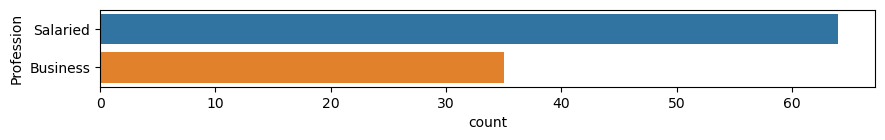

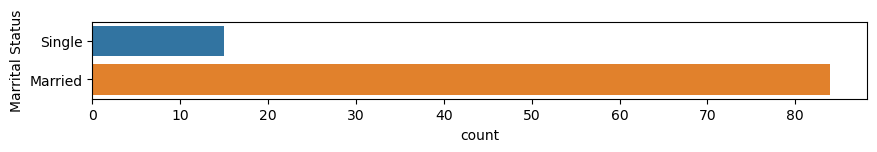

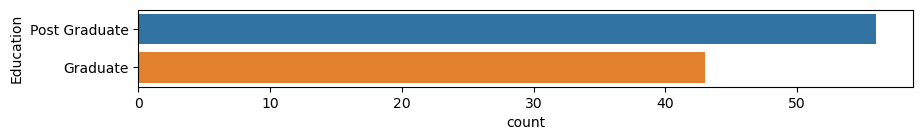

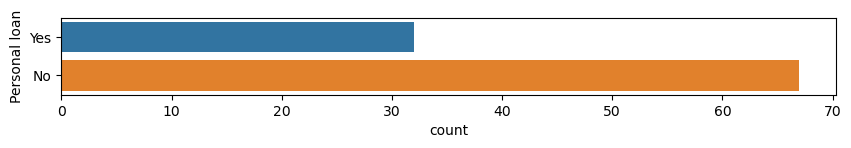

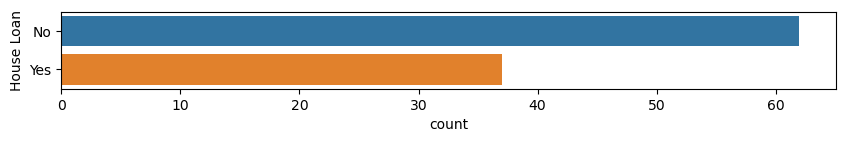

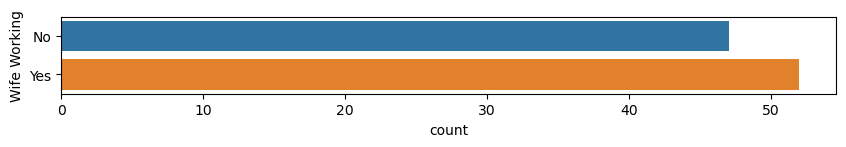

In [13]:
for x in col_cat:
    plt.figure(figsize = (10, 1))
    sns.countplot(y = df[x])

In [14]:
col_con

['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']

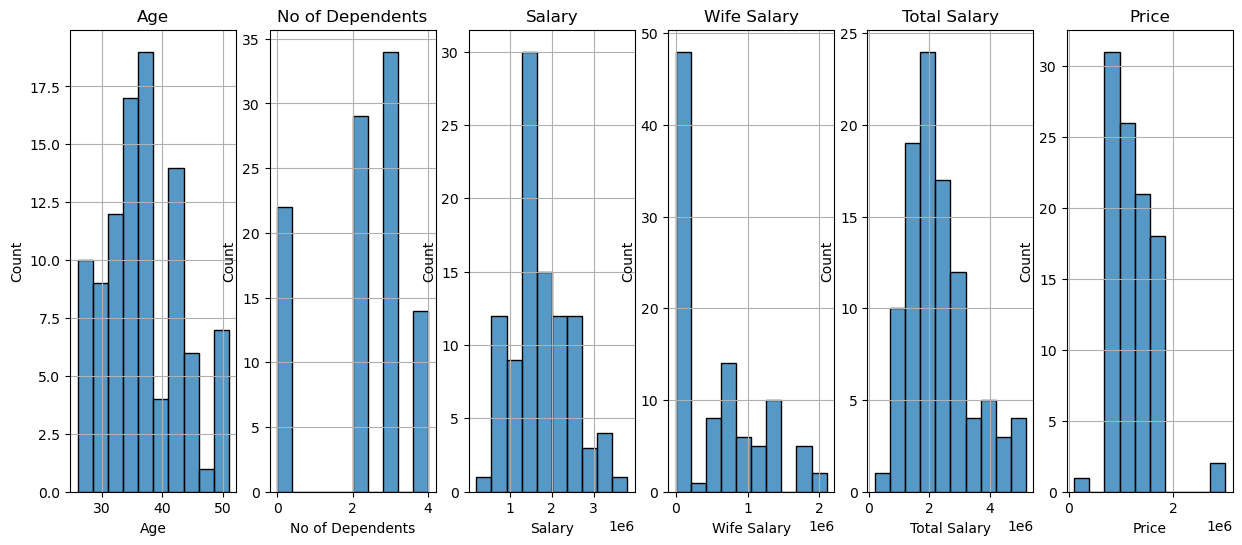

In [15]:
plt.figure(figsize=(15, 6))
n = 0

for x in col_con:
    n += 1
    plt.subplot(1, 6, n)
    plt.grid()
    sns.histplot(df[x], bins = 10)
    plt.title(x)

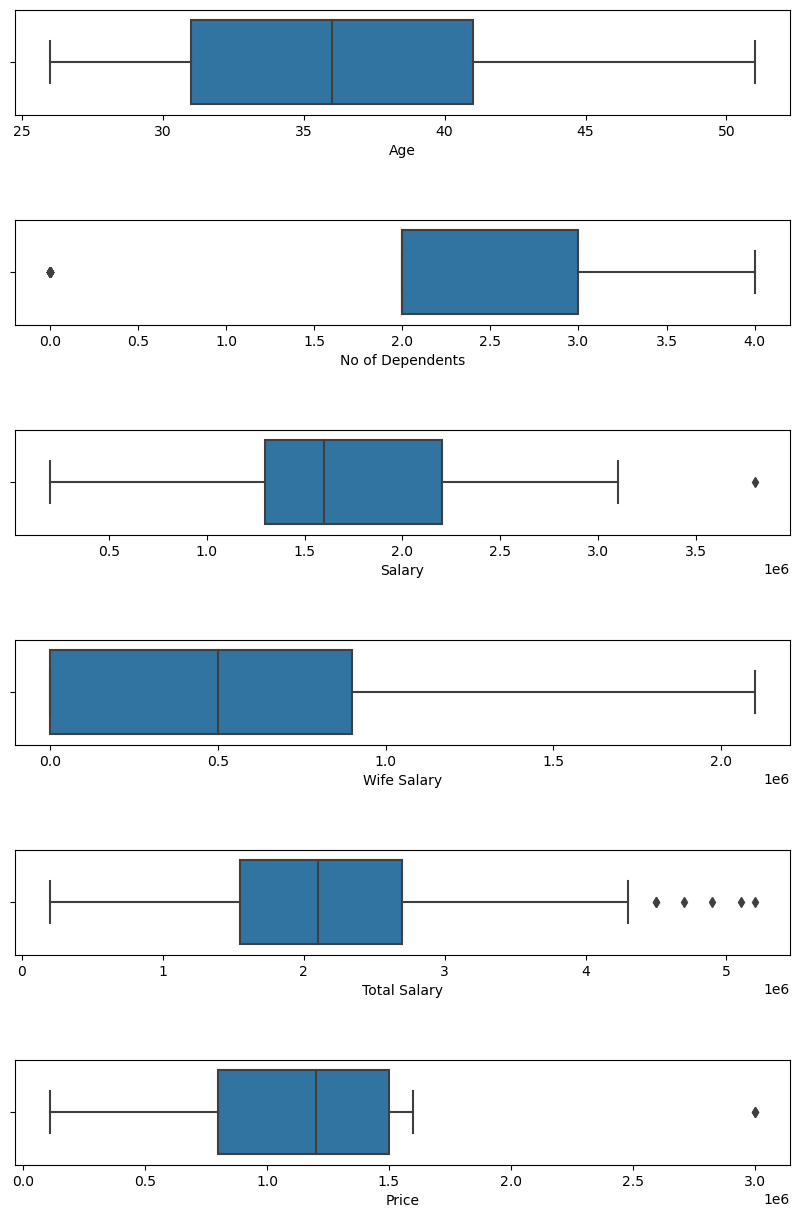

In [16]:
plt.figure(figsize=(10, 15))
n = 0

for x in col_con:
    n += 1
    plt.subplot(6, 1, n)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    sns.boxplot(x = df[x])

#### From above box plot and distplot we can get some intutions

**1)  Age group** between 32-42 have high density (36 being the median).

**2)  Number of dependents** between 2-3 have high density.

**3)  Price of the Car** between 8-15 lakhs have high density (12 lakhs being the median).

**4)  Total Salary** between 15-27 lakhs have high density (21 lakhs being the median).

In [17]:
for x in col_con:
    print('Median of', x, ': ', np.median(df[x]))

Median of Age :  36.0
Median of No of Dependents :  2.0
Median of Salary :  1600000.0
Median of Wife Salary :  500000.0
Median of Total Salary :  2100000.0
Median of Price :  1200000.0


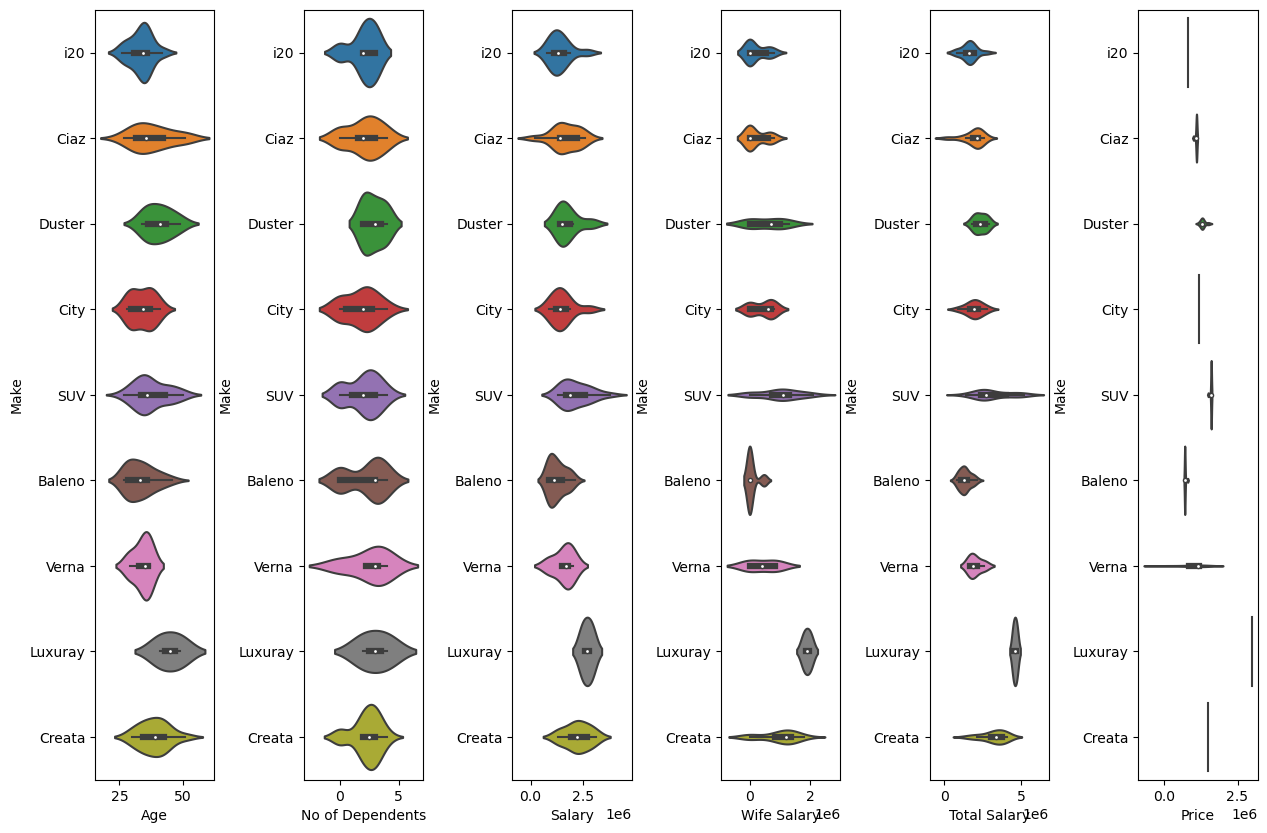

In [18]:
plt.figure(figsize=(15, 10))
n = 0

for x in col_con:
    n += 1
    plt.subplot(1, 6, n)
    plt.subplots_adjust(wspace=0.75)
    sns.violinplot(x = df[x], y = df['Make'])

In [19]:
price_by_name = {}
for x in df['Make'].unique():
    price_by_name[x] = np.mean(df[df['Make'] == x]['Price'])

In [20]:
price_by_name

{'i20': 800000.0,
 'Ciaz': 1091666.6666666667,
 'Duster': 1314285.7142857143,
 'City': 1200000.0,
 'SUV': 1594736.8421052631,
 'Baleno': 705263.1578947369,
 'Verna': 902500.0,
 'Luxuray': 3000000.0,
 'Creata': 1500000.0}

#### Now we will binarize all Categorical Columns

In [21]:
col_cat

['Profession',
 'Marrital Status',
 'Education',
 'Personal loan',
 'House Loan',
 'Wife Working']

In [22]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [23]:
df_encoded = df.copy()

df_encoded['Profession'] = df_encoded['Profession'].map(lambda x: 1 if x == 'Salaried' else 0)

df_encoded['Marrital Status'] = df_encoded['Marrital Status'].map(lambda x: 1 if x == 'Married' else 0)
df_encoded['House Loan'] = df_encoded['House Loan'].map(lambda x: 1 if x == 'Yes' else 0)
df_encoded['Personal loan'] = df_encoded['Personal loan'].map(lambda x: 1 if x == 'Yes' else 0)
df_encoded['Wife Working'] = df_encoded['Wife Working'].map(lambda x: 1 if x == 'Yes' else 0)

df_encoded['Education'] = df_encoded['Education'].map(lambda x: 1 if x == 'Post Graduate' else 0)

In [24]:
df_encoded.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,0,1,0,1,0,0,800000,0,800000,i20,800000
1,35,1,1,1,2,1,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,0,1,0,4,1,1,0,1800000,0,1800000,Duster,1200000
3,41,0,1,1,3,0,0,1,1600000,600000,2200000,City,1200000
4,31,1,1,1,2,1,0,1,1800000,800000,2600000,SUV,1600000


In [25]:
from sklearn.preprocessing import MinMaxScaler

df_encoded.drop(['Make'], axis = 1, inplace = True)

df_encoded_scaled = MinMaxScaler().fit_transform(df_encoded)

In [26]:
df_encoded_scaled = pd.DataFrame(data = df_encoded_scaled, columns=df_encoded.columns)

In [27]:
df_encoded_scaled.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,0.04,1.0,0.0,1.0,0.00,1.0,0.0,0.0,0.166667,0.000000,0.12,0.238754
1,0.36,1.0,1.0,1.0,0.50,1.0,1.0,1.0,0.333333,0.285714,0.36,0.307958
2,0.76,0.0,1.0,0.0,1.00,1.0,1.0,0.0,0.444444,0.000000,0.32,0.377163
3,0.60,0.0,1.0,1.0,0.75,0.0,0.0,1.0,0.388889,0.285714,0.40,0.377163
4,0.20,1.0,1.0,1.0,0.50,1.0,0.0,1.0,0.444444,0.380952,0.48,0.515571


<AxesSubplot:>

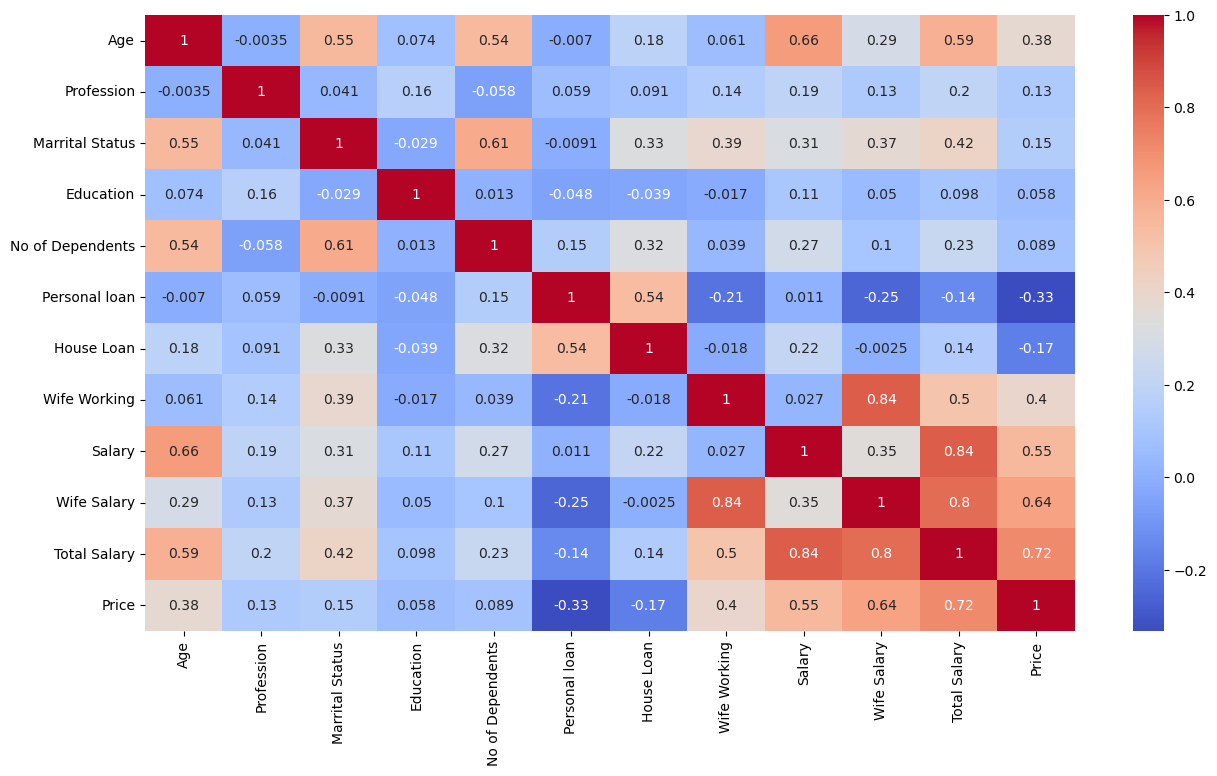

In [28]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_encoded_scaled.corr(), annot = True, cmap = 'coolwarm')

#### From the above heat map we can see some points like  :-

**1) Price of the car is positively correlated with Total Salary.**

**2) Price of the car is negatively correlated with House or Personal Loans.** (People tend to buy cheaper cars if they are in some kind of loan.

**3) Price of the car is postively correlated with Wife Working.** (This may be true because if both are working then total salary of the family is high and hence they tend to buy expensive cars).

**4) Price of the car is positively correlated with Age**. 

### Kmeans Clustering

In [29]:
from sklearn.cluster import KMeans

In [30]:
inertias = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_encoded_scaled)
    inertias[k] = kmeans.inertia_

C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Inertia')

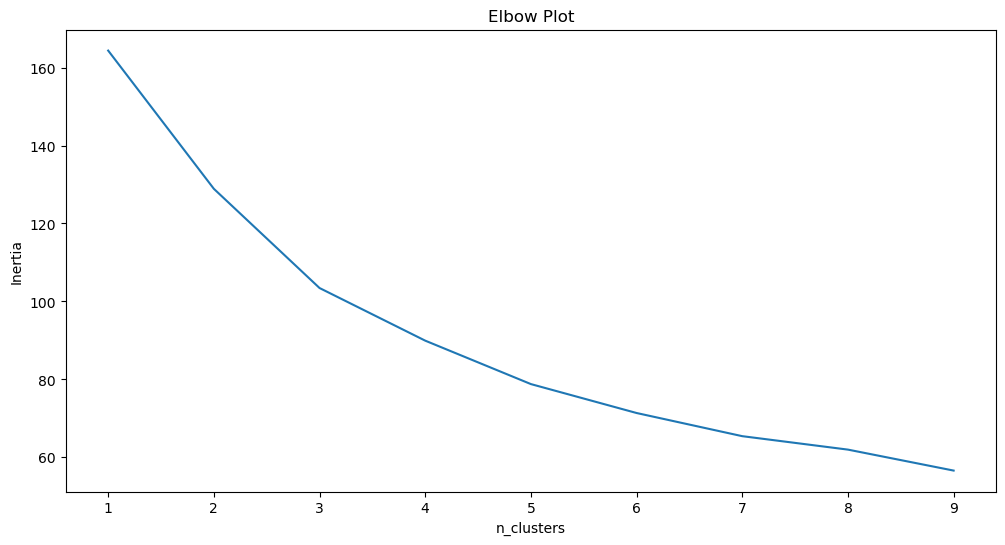

In [31]:
plt.figure(figsize = (12, 6))
plt.plot(inertias.keys(), inertias.values())
plt.title('Elbow Plot')
plt.xlabel('n_clusters')
plt.ylabel('Inertia')

In [32]:
kmeans = KMeans(n_clusters=3)
df_encoded_scaled['cluster'] = kmeans.fit_predict(df_encoded_scaled)

C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
df_encoded_scaled.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,cluster
0,0.04,1.0,0.0,1.0,0.00,1.0,0.0,0.0,0.166667,0.000000,0.12,0.238754,2
1,0.36,1.0,1.0,1.0,0.50,1.0,1.0,1.0,0.333333,0.285714,0.36,0.307958,0
2,0.76,0.0,1.0,0.0,1.00,1.0,1.0,0.0,0.444444,0.000000,0.32,0.377163,0
3,0.60,0.0,1.0,1.0,0.75,0.0,0.0,1.0,0.388889,0.285714,0.40,0.377163,1
4,0.20,1.0,1.0,1.0,0.50,1.0,0.0,1.0,0.444444,0.380952,0.48,0.515571,1


In [34]:
def plotElbow(features, x):
    x = x.loc[:, features]
    
    # Storing Inertia for every K
    inertias = {}
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(x)
        inertias[k] = kmeans.inertia_
        
    # Plotting Elbow Plot
    plt.figure(figsize = (8, 6))
    plt.plot(inertias.keys(), inertias.values())
    plt.title('Elbow Plot: ' + str(features))
    plt.xlabel('n_clusters')
    plt.ylabel('Inertia')
    


def plotSegments(features, x, k):
    x = x.loc[:, features]
    
    kmeans = KMeans(n_clusters=k)
    x['cluster'] = kmeans.fit_predict(x)
    
    # plotting the segments
    colors = ['red', 'green', 'blue', 'yellow', 'brown', 'orange']
    
    plt.figure(figsize = (8, 6))
    sns.scatterplot(x = df[features[0]], y = df[features[1]], hue = x['cluster'], palette = colors[:k])
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title('Segmentation using variables: ' + str(features))
    plt.show()

### Using Age and Price for segmentation

C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

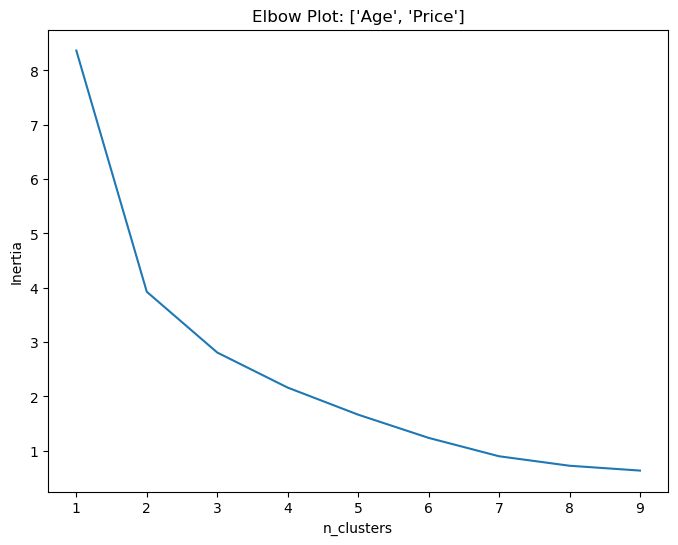

In [35]:
plotElbow(['Age', 'Price'], df_encoded_scaled)

C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


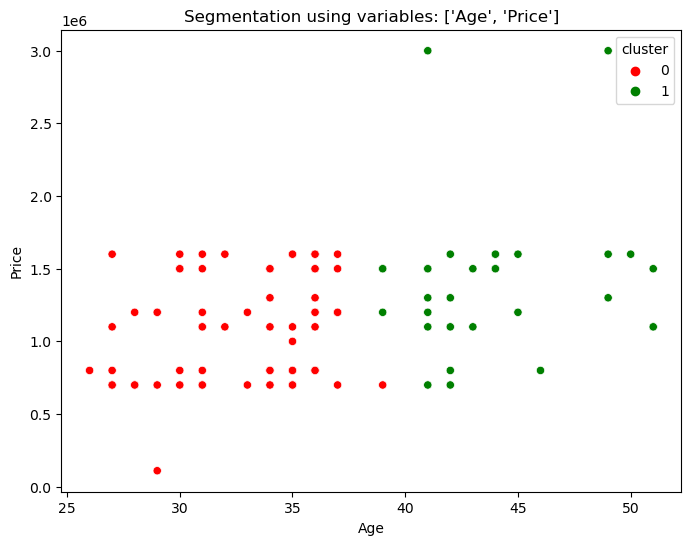

In [36]:
plotSegments(['Age', 'Price'], df_encoded_scaled, 2)

#### From above plot we can see we can divide the market into 2 segments.
**We can see clear boundry in Age at around 38.**

**Due to less data we cannot clearly see boundry on the price axis but we can get the intuition that the two segments are Age <= 38 and low to medium priced vehicles and other is Age > 38 and medium to high priced vehicle.**

### Using Total Salary and Price for segmentation

C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

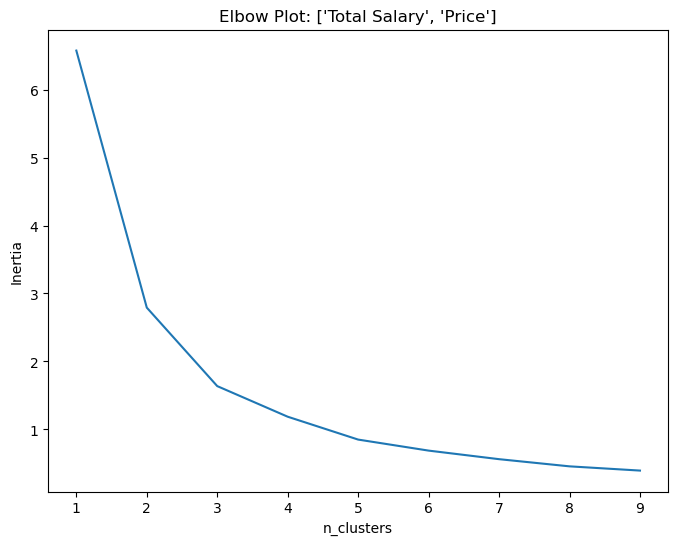

In [37]:
plotElbow(['Total Salary', 'Price'], df_encoded_scaled)

C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


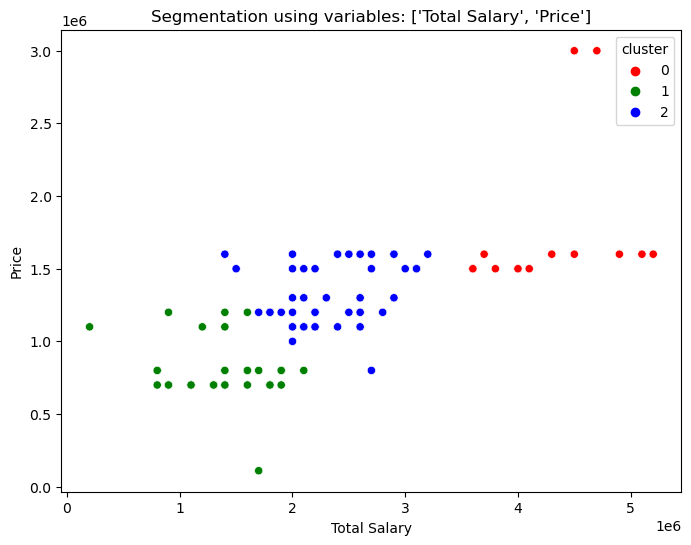

In [38]:
plotSegments(['Total Salary', 'Price'], df_encoded_scaled, 3)

#### From the above segmentation plot we can see that we can easily divide market into 3 segments using Total Salary and Price

**1st segment is people with Annual Salary <= 20 lakhs and they prefer low end vehicles with price ranging in between 5-12 lakhs.**

**2nd segment is people with Annual Salary in between 20-30 lakhs and they prefer medium end vehicles with price ranging in between 10-17 lakhs.**

**3rd segment is people with Annual Salary > 30 lakhs and they prefer high end vehicles with price above 18 lakhs.**



In [39]:
df_encoded_scaled

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,cluster
0,0.04,1.0,0.0,1.0,0.00,1.0,0.0,0.0,0.166667,0.000000,0.12,0.238754,2
1,0.36,1.0,1.0,1.0,0.50,1.0,1.0,1.0,0.333333,0.285714,0.36,0.307958,0
2,0.76,0.0,1.0,0.0,1.00,1.0,1.0,0.0,0.444444,0.000000,0.32,0.377163,0
3,0.60,0.0,1.0,1.0,0.75,0.0,0.0,1.0,0.388889,0.285714,0.40,0.377163,1
4,0.20,1.0,1.0,1.0,0.50,1.0,0.0,1.0,0.444444,0.380952,0.48,0.515571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.611111,0.000000,0.44,0.515571,2
95,0.96,1.0,1.0,1.0,0.75,0.0,0.0,1.0,1.000000,0.619048,0.98,0.515571,1
96,1.00,0.0,1.0,0.0,0.50,1.0,1.0,0.0,0.555556,0.000000,0.40,0.342561,0
97,1.00,1.0,1.0,1.0,0.50,0.0,0.0,1.0,0.694444,0.619048,0.76,0.480969,1


### Using Age and Total Salary as segmentation variables

C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

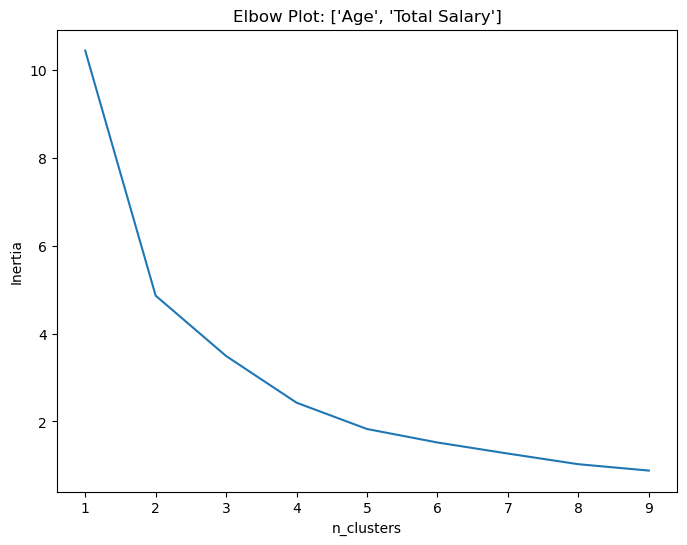

In [40]:
plotElbow(['Age', 'Total Salary'], df_encoded_scaled)

C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


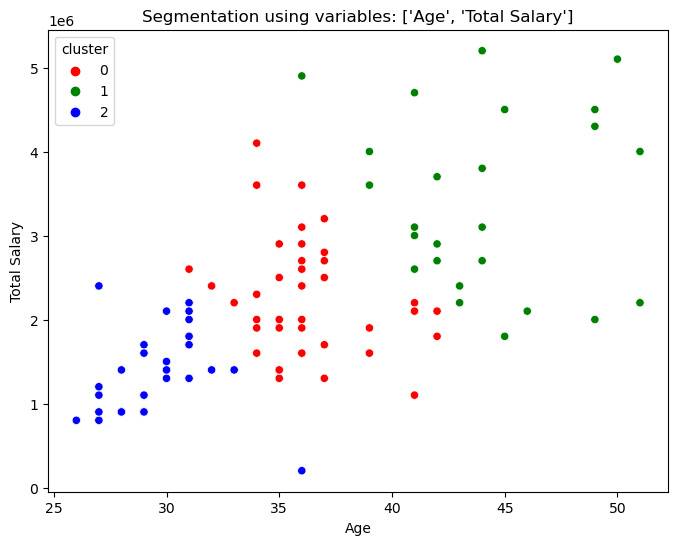

In [41]:
plotSegments(['Age', 'Total Salary'], df_encoded_scaled, 3)

### Using Age, Total Salary, Price as segmentation Variables

C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

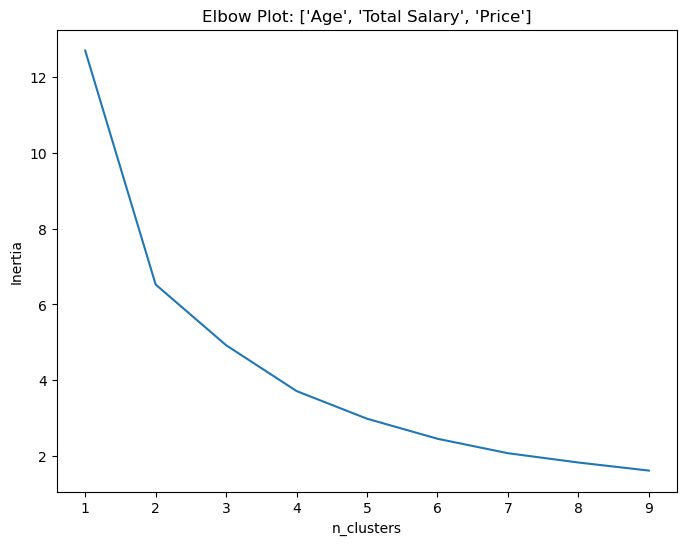

In [42]:
plotElbow(['Age', 'Total Salary', 'Price'], df_encoded_scaled)

In [43]:
def plotSegments3D(feature, x):
    x1 = df_encoded_scaled.loc[:, feature]
    
    kmeans = KMeans(n_clusters=3)
    x['cluster'] = kmeans.fit_predict(x1)
    
    # plotting the segments
    
    fig = plt.figure(figsize = (15, 15))
    
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[x['cluster'] == 0][feature[0]], x[x['cluster'] == 0][feature[1]], x[x['cluster'] == 0][feature[2]], c = 'green')
    ax.scatter(x[x['cluster'] == 1][feature[0]], x[x['cluster'] == 1][feature[1]], x[x['cluster'] == 1][feature[2]], c = 'blue')
    ax.scatter(x[x['cluster'] == 2][feature[0]], x[x['cluster'] == 2][feature[1]], x[x['cluster'] == 2][feature[2]], c = 'red')
    ax.view_init(30, 185)
    
    ax.set_xlabel(feature[0], fontweight ='bold')
    ax.set_ylabel(feature[1], fontweight ='bold')
    ax.set_zlabel(feature[2], fontweight ='bold')
    plt.title('Segmentation using variables: ' + str(feature))
    plt.show()

C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


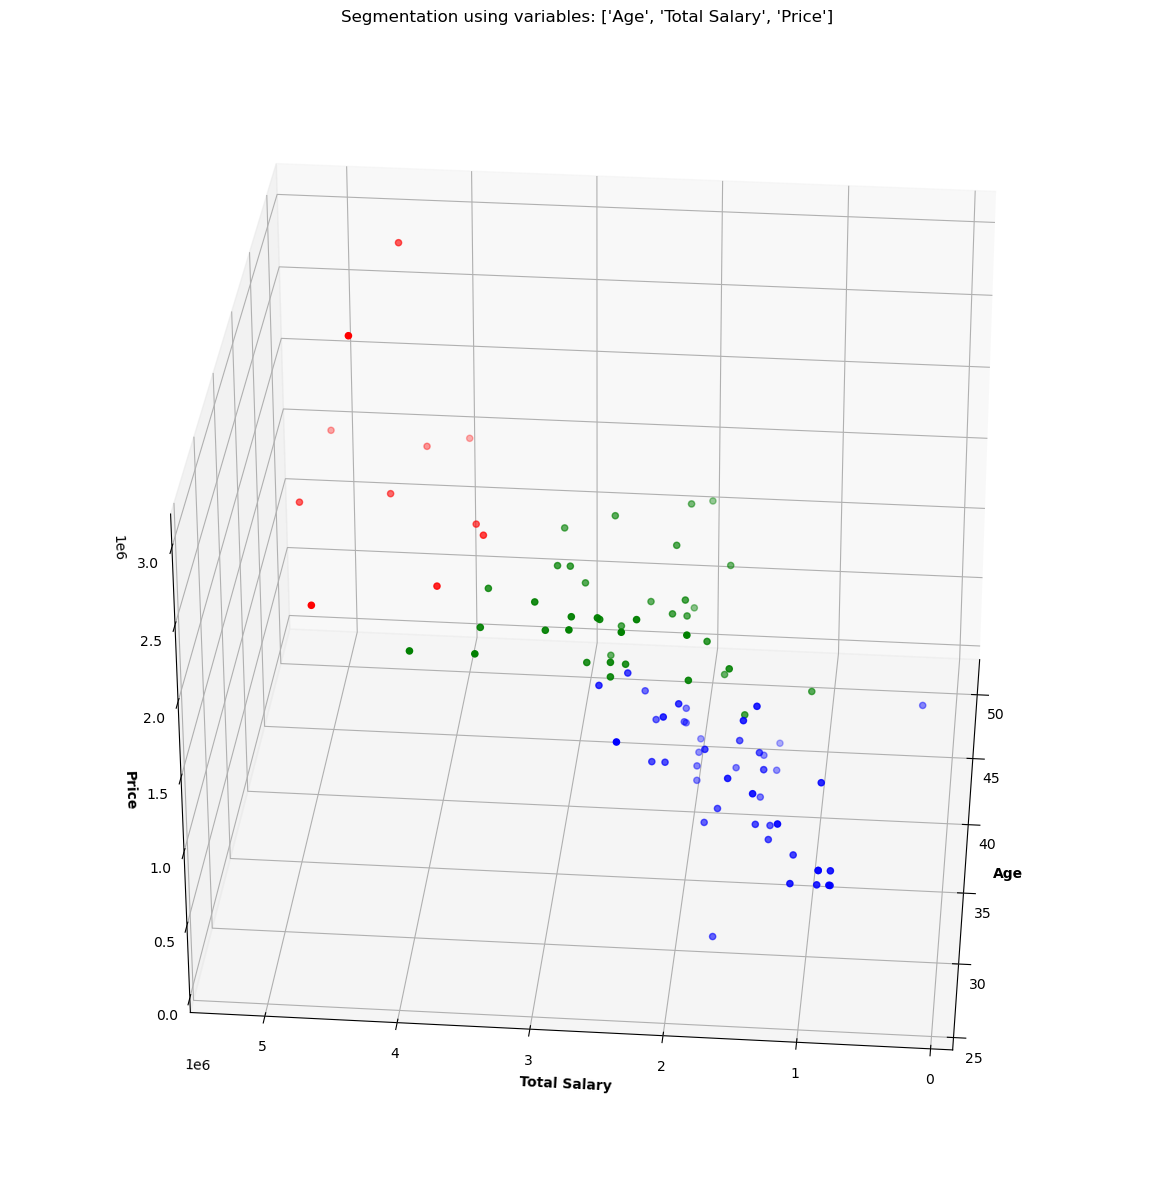

In [44]:
plotSegments3D(['Age', 'Total Salary', 'Price'], df)